In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_sample_image

import tensorflow as tf

#dataset = np.array(load_sample_images().images, dtype=np.float32)
#dataset = dataset[150:220, 130:250]
#batch_size, height, width, channels = dataset.shape

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)



In [8]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


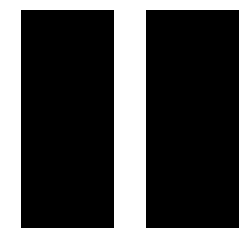

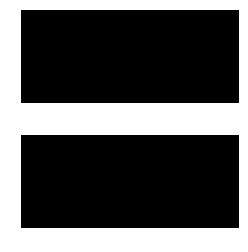

In [9]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation="nearest")
    plt.axis("off")

fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1

plot_image(fmap[:, :, 0, 0])
plt.show()
    
plot_image(fmap[:, :, 0, 1])
plt.show()

In [10]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1, 1, 1, 1], padding="SAME", use_cudnn_on_gpu=False)
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

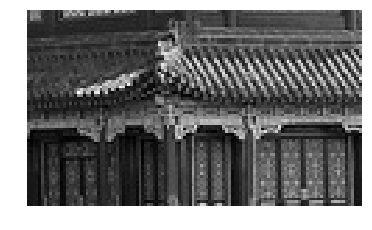

In [11]:

plot_image(images[0, :, :, 0])
plt.show()

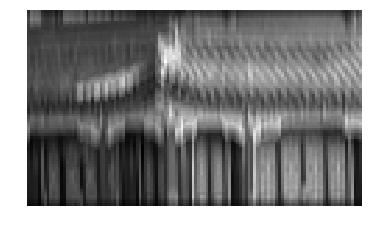

In [12]:
plot_image(output[0, :, :, 0])
plt.show()

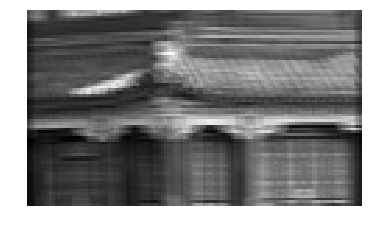

In [13]:
plot_image(output[0, :, :, 1])
plt.show()

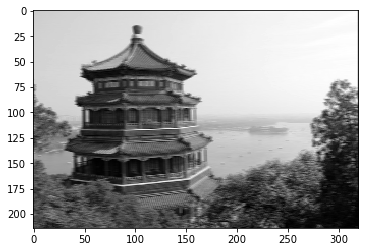

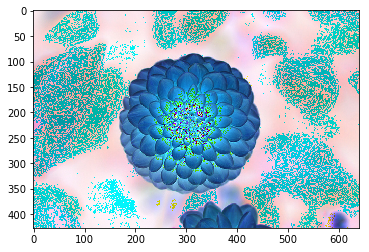

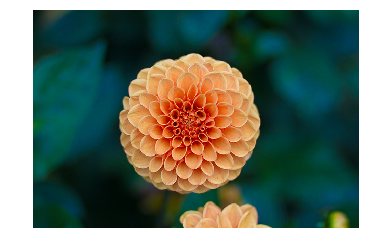

A


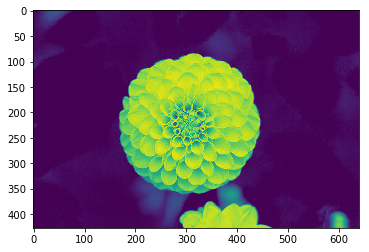

In [14]:
import numpy as np
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

plt.imshow(dataset[1, :, :, :])
plt.show()

plot_color_image(dataset[1, :, :, :])
plt.show()

print("A")

plt.imshow(dataset[1, :, :, 0].astype(np.uint8), interpolation="nearest")
#plt.axis("off")

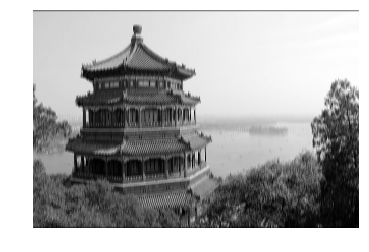

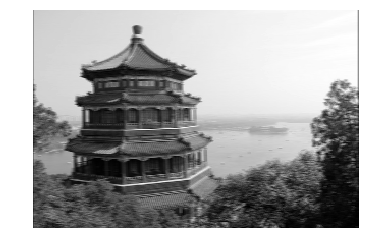

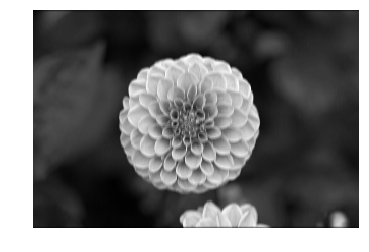

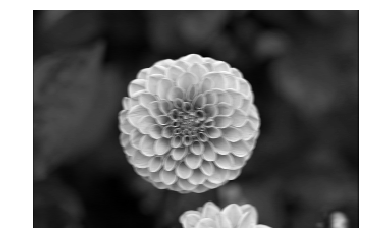

In [15]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

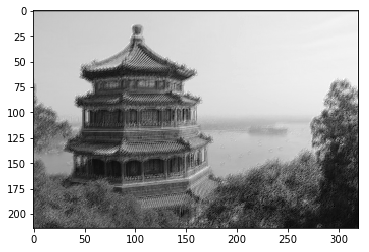

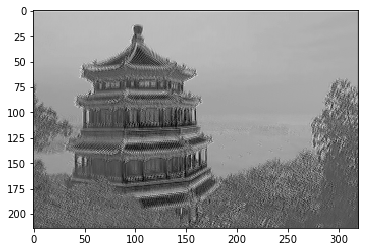

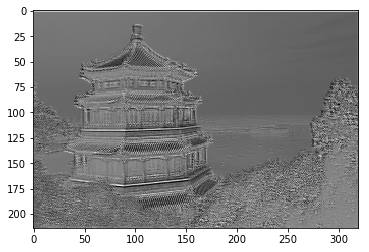

In [16]:
reset_graph()
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=5
                        , kernel_size=7, strides=[2,2], padding="SAME")
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})
    
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()
plt.imshow(output[0,:,:,0], cmap="gray")
plt.show()
plt.imshow(output[0,:,:,2], cmap="gray")
plt.show()

In [17]:
reset_graph()
filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
filter_primes.reshape(1, 6, 1, 1)
filter_primes

array([  2.,   3.,   5.,   7.,  11.,  13.], dtype=float32)

In [18]:
batch_size, height, width, channels = dataset.shape
dataset.shape

(2, 427, 640, 3)

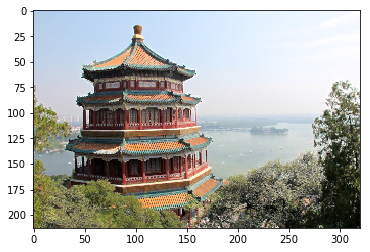

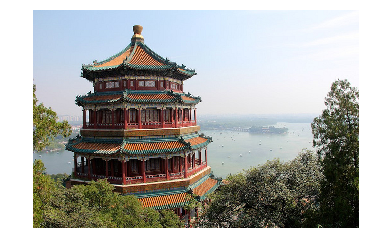

In [19]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})
plt.imshow(output[0].astype(np.uint8))
plt.show()
plot_color_image(dataset[0])
plt.show()

In [25]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    
conv1 = tf.layers.conv2d(X_reshaped, filters= conv1_fmaps, kernel_size=conv1_ksize, strides=conv1_stride, 
                         padding=conv1_pad, activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters= conv2_fmaps, kernel_size=conv2_ksize, strides=conv2_stride, 
                         padding=conv2_pad, activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps*7*7])
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    

In [26]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [29]:
n_epochs = 10
batch_size =100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y:mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.99 Test accuracy: 0.9759
1 Train accuracy: 0.99 Test accuracy: 0.9803
2 Train accuracy: 0.97 Test accuracy: 0.9832
3 Train accuracy: 1.0 Test accuracy: 0.9872
4 Train accuracy: 1.0 Test accuracy: 0.9885
5 Train accuracy: 0.97 Test accuracy: 0.9885
6 Train accuracy: 1.0 Test accuracy: 0.9899
7 Train accuracy: 0.99 Test accuracy: 0.989
8 Train accuracy: 1.0 Test accuracy: 0.9881
9 Train accuracy: 1.0 Test accuracy: 0.9885
